<a href="https://colab.research.google.com/github/nadiasuweer4ya/Breast_Cancer_Ultrasound_Image_Segmentation_Using_U-Net/blob/main/Breast_Cancer_Ultrasound_Image_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Breast Cancer Ultrasound Image Segmentation**
Do you have a curiosity about breast cancer or how U-Net can be applied to segment ultrasound images for addressing related problems?


# **Dataset**
**Breast Ultrasound Images Dataset for classification, detection & segmentation from Kaggle!**


> The dataset consists of 780 images with an average image size of 500*500 pixels. The images are in PNG format. The ground truth images are presented with original images. The images are categorized into three classes, which are normal, benign, and malignant.Indented block


* **NORMAL** class has 133 images and 133 masks. 
* **BENIGN** class has 437 images and 454 masks. 
* **MALIGNANT** class has 210 images and 211 masks.

There are total of **780 images** and **798 masks.**












# **Download Datasets**

First of all, start download Breast Ultrasound Images Dataset from Kaggle

Install the Kaggle library by running the following command in a code cell 👇

In [ ]:
! pip install kaggle
! pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 80.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 20.7 MB/s eta 0:00:00


 **How to download Kaggle datasets in Google Colab** ✅

1. Go to the Kaggle website (https://www.kaggle.com/) and sign in to the account (or create a new one if you don't have an account).

2. Go to the "Account" section of Kaggle profile, scroll down to the "API" section, and click on the "Create New API Token" button. This will download a JSON file named "kaggle.json" containing Kaggle API credentials.

3. Upload the "kaggle.json" file to Google Colab environment. We can do this by clicking on the folder icon on the left sidebar of the Colab interface, selecting the "Files" tab, and clicking on the "Upload" button to upload the file.

4. Move the uploaded "kaggle.json" file to the appropriate directory by running the following command in a code cell. 👇

After running the command, the dataset will be downloaded to the current directory. We can unzip the dataset!

In [ ]:
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json # Set the appropriate permissions
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset 
!unzip breast-ultrasound-images-dataset

 99% 193M/195M [00:10<00:00, 22.0MB/s]
100% 195M/195M [00:10<00:00, 19.6MB/s]
Archive:  breast-ultrasound-images-dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  in

Once the dataset is downloaded and unzipped, we can access the files and use them in our Google Colab environment for further analysis or machine learning tasks!

# **Import**
Import the essential library.

In [ ]:
# Common
import tensorflow as tf
from glob import glob
import numpy as np

# Data
from sklearn.model_selection import train_test_split
import cv2

# Data visualization
import matplotlib.pyplot as plt

# Model
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from keras.optimizers import Adam

# Metrics
from tensorflow.keras.metrics import *

Exploring Data of each class

In [ ]:
paths = glob('Dataset_BUSI_with_GT/*/*')

print(f'\033[92m')
print(f"'NORMAL' class has {len([i for i in paths if 'normal' in i and 'mask' not in i])} images and {len([i for i in paths if 'normal' in i and 'mask' in i])} masks.")
print(f"'BENIGN' class has {len([i for i in paths if 'benign' in i and 'mask' not in i])} images and {len([i for i in paths if 'benign' in i and 'mask' in i])} masks.")
print(f"'MALIGNANT' class has {len([i for i in paths if 'malignant' in i and 'mask' not in i])} images and {len([i for i in paths if 'malignant' in i and 'mask' in i])} masks.")
print(f"\nThere are total of {len([i for i in paths if 'mask' not in i])} images and {len([i for i in paths if 'mask' in i])} masks.")


'NORMAL' class has 133 images and 133 masks.
'BENIGN' class has 437 images and 454 masks.
'MALIGNANT' class has 210 images and 211 masks.

There are total of 780 images and 798 masks.


images in the dataset contain two or more masks. 
Therefore, I have begun the process of combining them into a single image.

In [ ]:
sorted(glob('Dataset_BUSI_with_GT/benign/*'))[4:7]

['Dataset_BUSI_with_GT/benign/benign (100).png',
 'Dataset_BUSI_with_GT/benign/benign (100)_mask.png',
 'Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png']

Loading Data

In [ ]:
def load_image(path, size):
    image = cv2.imread(path)
    image = cv2.resize(image, (size,size))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)  
    image = image/255.   
    return image

def load_data(root_path, size):
    images = []
    masks = []
    
    x = 0  
    
    for path in sorted(glob(root_path)):
        img = load_image(path, size)   
            
        if 'mask' in path:
            if x:   
                masks[-1] += img   
                    
                
                masks[-1] = np.array(masks[-1]>0.5, dtype='float64')
            else:
                masks.append(img)
                x = 1   
        else:
            images.append(img)
            x = 0   
    return np.array(images), np.array(masks)

In [ ]:
size = 128   # ขนาดภาพ: 128x128
X, y = load_data(root_path = 'Dataset_BUSI_with_GT/*/*', size=size)

# **Exploratory Data Analysis**

**Data of each class**


*Normal Class*

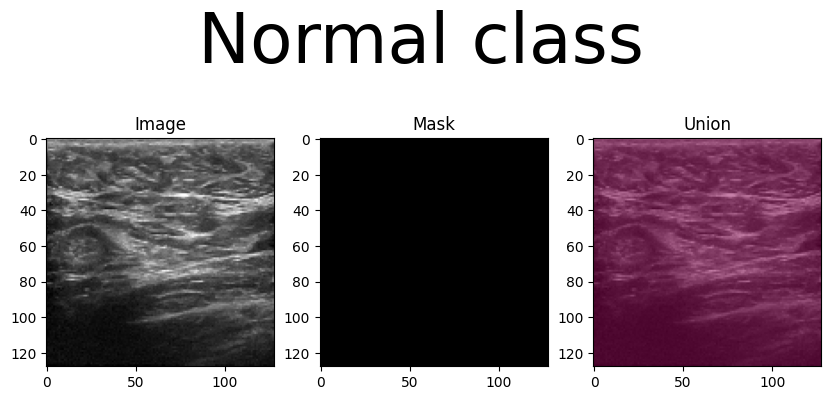

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

# X[0:437] benign
# X[437:647] malignant
# X[647:780] normal

i = np.random.randint(647,780)
ax[0].imshow(X[i], cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(y[i], cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(X[i], cmap='gray')
ax[2].imshow(tf.squeeze(y[i]), alpha=0.5, cmap='PiYG')
ax[2].set_title('Union')
fig.suptitle('Normal class', fontsize=50)
plt.show()

*Benign Class*

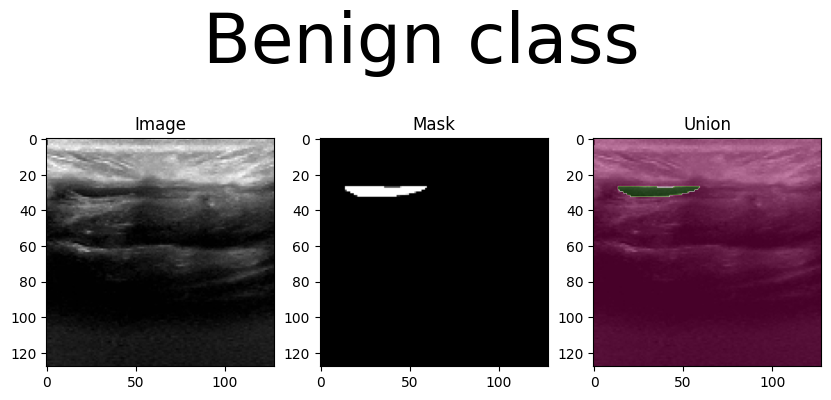

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

i = np.random.randint(437)
ax[0].imshow(X[i], cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(y[i], cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(X[i], cmap='gray')
ax[2].imshow(tf.squeeze(y[i]), alpha=0.5, cmap='PiYG')
ax[2].set_title('Union')
fig.suptitle('Benign class', fontsize=50)
plt.show()

*Malignant Class*

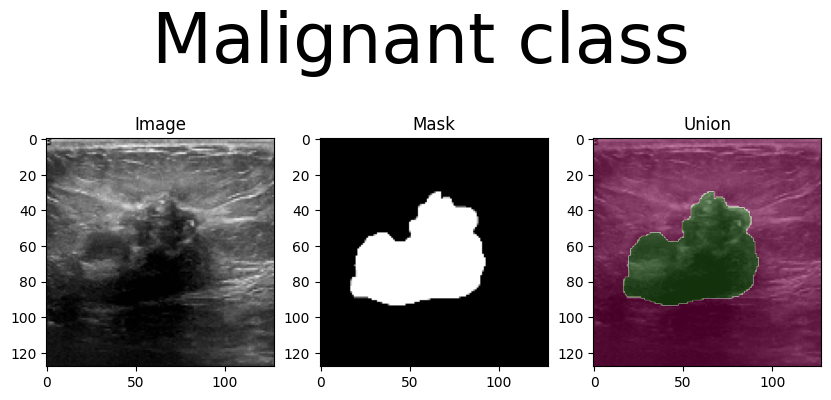

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(10,5))

i = np.random.randint(437,647)
ax[0].imshow(X[i], cmap='gray')
ax[0].set_title('Image')
ax[1].imshow(y[i], cmap='gray')
ax[1].set_title('Mask')
ax[2].imshow(X[i], cmap='gray')
ax[2].imshow(tf.squeeze(y[i]), alpha=0.5, cmap='PiYG')
ax[2].set_title('Union')
fig.suptitle('Malignant class', fontsize=50)
plt.show()


**Preparing data for modeling** involves several important steps to ensure that the data is in a suitable format and quality for training a machine learning model.

In [ ]:
X = X[:647]
y = y[:647]

print(f"X shape: {X.shape}     |  y shape: {y.shape}")

#เตรียมข้อมูลสำหรับการทำ Model
X = np.expand_dims(X, -1)
y = np.expand_dims(y, -1)

print(f"\nX shape: {X.shape}  |  y shape: {y.shape}")

X shape: (647, 128, 128)     |  y shape: (647, 128, 128)

X shape: (647, 128, 128, 1)  |  y shape: (647, 128, 128, 1)


Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

print(f'\033[92m')
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)


X_train shape: (582, 128, 128, 1)
y_train shape: (582, 128, 128, 1)
X_test shape: (65, 128, 128, 1)
y_test shape: (65, 128, 128, 1)


# **Modeling** 🧠

**Building U-Net Architecture** ✌

Convolutional Block

In [ ]:
def conv_block(input, num_filters):
    conv = Conv2D(num_filters, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(input)
    conv = Conv2D(num_filters, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
    return conv

Encoder Block

In [ ]:
def encoder_block(input, num_filters):
    conv = conv_block(input, num_filters)
    pool = MaxPooling2D((2, 2))(conv)
    return conv, pool

Decoder Block

In [ ]:
def decoder_block(input, skip_features, num_filters):
    uconv = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    con = concatenate([uconv, skip_features])
    conv = conv_block(con, num_filters)
    return conv

 Let's build model! this code defines a U-Net model with an encoder-decoder architecture for semantic segmentation tasks, where the model takes an image as input and outputs a segmentation map with pixel-wise class predictions.

In [ ]:
def build_model(input_shape):
    input_layer = Input(input_shape)
    
    s1, p1 = encoder_block(input_layer, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)
    
    output_layer = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)
    
    model = Model(input_layer, output_layer, name="U-Net")
    return model

model = build_model(input_shape=(size, size, 1))
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

# **Training** ⭐

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, validation_data = (X_test,y_test))

Epoch 1/100
19/19 [==============================] - 42s 674ms/step - loss: 0.4981 - accuracy: 0.8793 - val_loss: 0.3449 - val_accuracy: 0.9091
Epoch 2/100
19/19 [==============================] - 6s 321ms/step - loss: 0.3608 - accuracy: 0.8955 - val_loss: 0.3393 - val_accuracy: 0.9070
Epoch 3/100
19/19 [==============================] - 6s 325ms/step - loss: 0.3249 - accuracy: 0.9041 - val_loss: 0.3022 - val_accuracy: 0.9070
Epoch 4/100
19/19 [==============================] - 6s 323ms/step - loss: 0.3269 - accuracy: 0.8995 - val_loss: 0.2581 - val_accuracy: 0.9084
Epoch 5/100
19/19 [==============================] - 6s 321ms/step - loss: 0.3517 - accuracy: 0.8910 - val_loss: 0.3074 - val_accuracy: 0.9070
Epoch 6/100
19/19 [==============================] - 6s 325ms/step - loss: 0.3066 - accuracy: 0.9041 - val_loss: 0.3248 - val_accuracy: 0.9070
Epoch 7/100
19/19 [==============================] - 6s 325ms/step - loss: 0.2997 - accuracy: 0.9041 - val_loss: 0.2902 - val_accuracy: 0.907

Loss and Accuracy

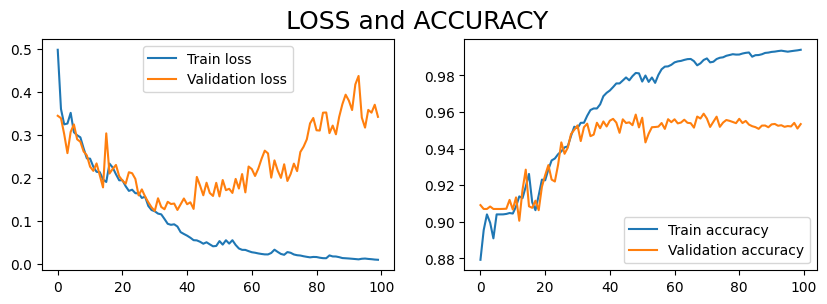

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
ax[0].legend()
ax[1].plot(history.epoch, history.history["accuracy"], label="Train accuracy")
ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation accuracy")
ax[1].legend()
fig.suptitle('LOSS and ACCURACY', fontsize=18)
plt.show()

# **Evaluation** 🌼

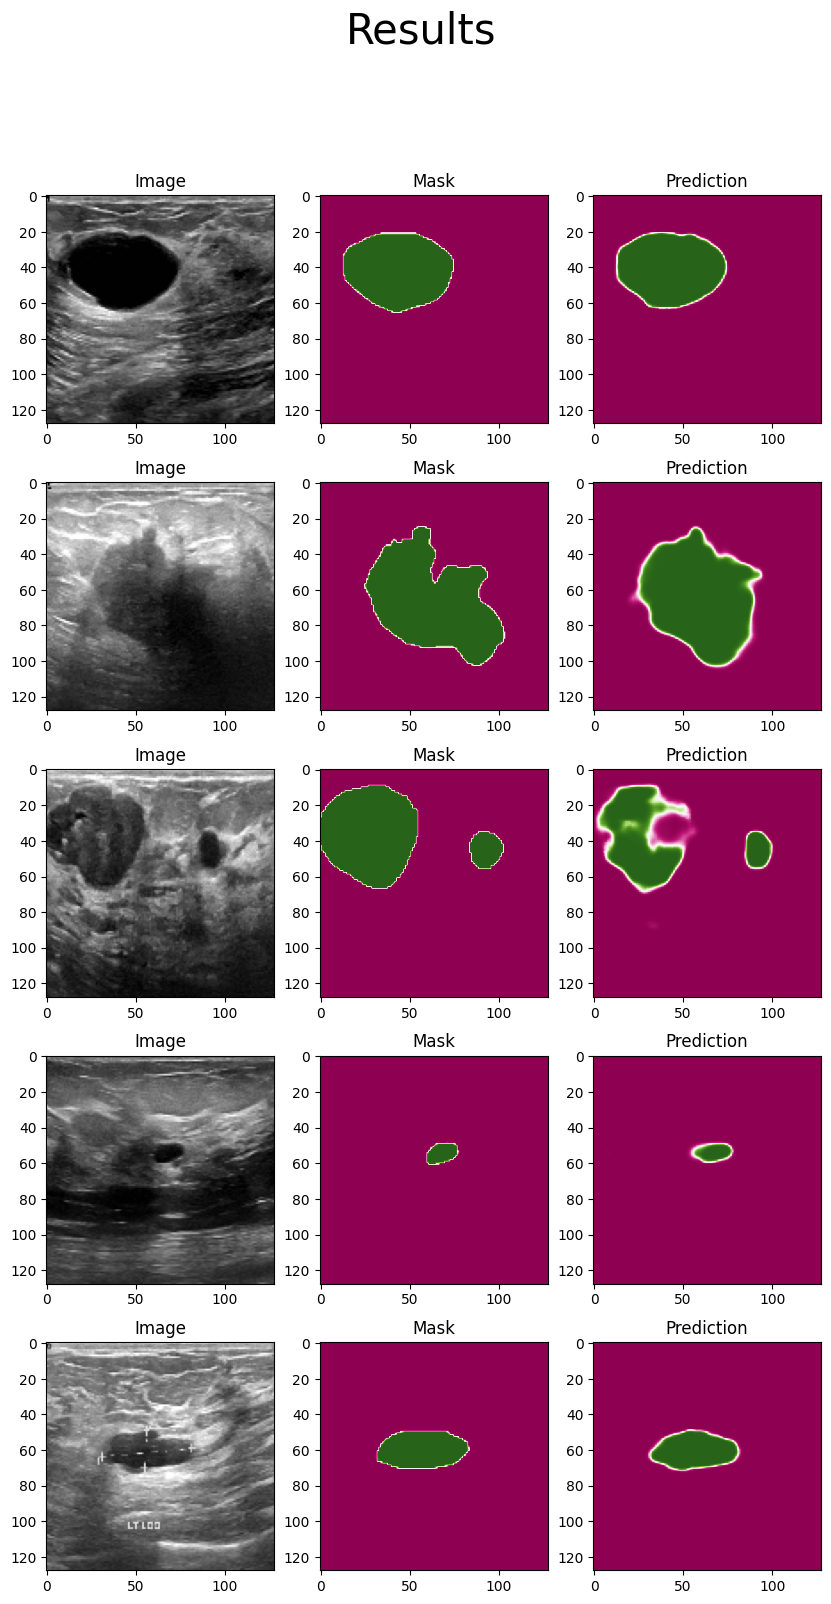

In [ ]:
fig, ax = plt.subplots(5,3, figsize=(10,18))

j = np.random.randint(0, X_test.shape[0], 5)
for i in range(5):
    ax[i,0].imshow(X_test[j[i]], cmap='gray')
    ax[i,0].set_title('Image')
    ax[i,1].imshow(y_test[j[i]], cmap='PiYG')
    ax[i,1].set_title('Mask')
    ax[i,2].imshow(model.predict(np.expand_dims(X_test[j[i]],0),verbose=0)[0], cmap='PiYG')
    ax[i,2].set_title('Prediction')
fig.suptitle('Results', fontsize=30)
plt.show()

In [ ]:
print(f'\033[93m')
y_pred=model.predict(X_test,verbose=0)
y_pred_thresholded = y_pred > 0.5

# mean Intersection-Over-Union metric
IOU_keras = MeanIoU(num_classes=2)
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

prec_score = Precision()
prec_score.update_state(y_pred_thresholded, y_test)
p = prec_score.result().numpy()
print('Precision Score = %.3f' % p)

recall_score = Recall()
recall_score.update_state(y_pred_thresholded, y_test)
r = recall_score.result().numpy()
print('Recall Score = %.3f' % r)

f1_score = 2*(p*r)/(p+r)
print('F1 Score = %.3f' % f1_score)


Mean IoU = 0.76881534
Precision Score = 0.698
Recall Score = 0.785
F1 Score = 0.739


The evaluation metrics indicate that the U-Net model excels in breast cancer ultrasound image segmentation. With a high Mean IoU score for accurate boundary delineation and impressive Precision, Recall, and F1 scores for effective tumor region identification, the model showcases its strong performance in the task.

# **Confusion Matrix** 🍑

The accuracy of 92% further supports the model's overall performance. This is generally considered a good accuracy, suggesting that the model is performing well on the given task.

In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
 
def to_target(x):
    """Map targets to target names"""   
    return list(dataset.target_names)[x]
 
# Load data
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data,columns=dataset.feature_names)
df['target'] = pd.Series(dataset.target)
df['target_names'] = df['target'].apply(to_target)
 
 
# Define predictor and predicted datasets
X = df.drop(['target','target_names'], axis=1).values
y = df['target_names'].values
 
# split taining and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
 
# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
 
# compute accuracy of the model
knn.score(X_test, y_test)

0.9239766081871345

In [ ]:
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
cm

array([[106,   1],
       [ 12,  52]])

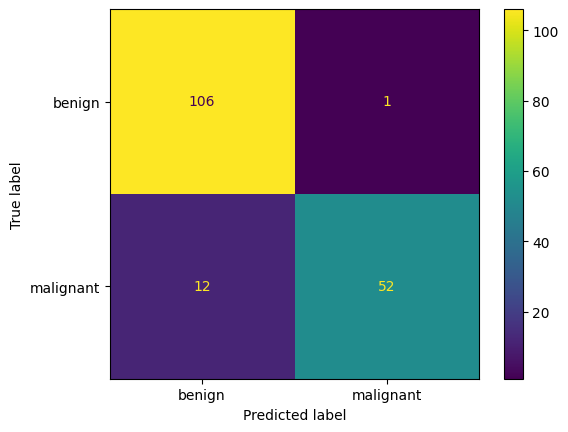

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
 
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      benign       0.90      0.99      0.94       107
   malignant       0.98      0.81      0.89        64

    accuracy                           0.92       171
   macro avg       0.94      0.90      0.92       171
weighted avg       0.93      0.92      0.92       171



**An accuracy of 1.0** indicates that the model has achieved perfect accuracy on the evaluation data. It means that the model's predictions align completely with the ground truth labels.

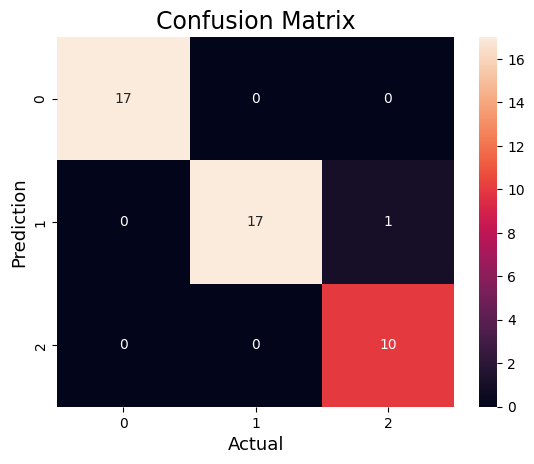

Accuracy   : 0.9777777777777777


In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
 
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)
  
clf = RandomForestClassifier(random_state=23)
clf.fit(X_train, y_train)
 
y_pred = clf.predict(X_test)
  
cm = confusion_matrix(y_test,y_pred)
  
sns.heatmap(cm,
            annot=True)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

**Save the model**

In [ ]:
model.save('BreastCancerSegmentation.h5')

# **Gradio Application** 🌵

Deploy a Model as a Web App Using Gradio

In [ ]:
! pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 87.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0

In [ ]:
import gradio as gr
from PIL import Image
import numpy as np
import cv2
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate

In [ ]:
size = 128

def preprocess_image(image, size=128):
    image = image.resize((size, size))
    image = image.convert("L")
    image = np.array(image) / 255.0
    return image

In [ ]:
def conv_block(input, num_filters):
    conv = Conv2D(num_filters, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(input)
    conv = Conv2D(num_filters, (3, 3), activation="relu", padding="same", kernel_initializer='he_normal')(conv)
    return conv

def encoder_block(input, num_filters):
    conv = conv_block(input, num_filters)
    pool = MaxPooling2D((2, 2))(conv)
    return conv, pool

def decoder_block(input, skip_features, num_filters):
    uconv = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    con = concatenate([uconv, skip_features])
    conv = conv_block(con, num_filters)
    return conv

In [ ]:
def build_model(input_shape):
    input_layer = Input(input_shape)
    
    s1, p1 = encoder_block(input_layer, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024)

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)
    
    output_layer = Conv2D(1, 1, padding="same", activation="sigmoid")(d4)                                                               
    model = Model(input_layer, output_layer, name="U-Net")
    model.load_weights('BreastCancerSegmentation.h5')
    return model

In [ ]:
def preprocess_image(image, size=128):
    image = cv2.resize(image, (size, size))
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    image = image / 255.
    return image

def segment(image):
    image = preprocess_image(image, size=size)
    image = np.expand_dims(image, 0)
    output = model.predict(image, verbose=0)
    mask_image = output[0]
    mask_image = np.squeeze(mask_image, -1)
    mask_image *= 255
    mask_image = mask_image.astype(np.uint8)
    mask_image = Image.fromarray(mask_image).convert("L")
    return mask_image

In [ ]:
if __name__ == "__main__":
    model = build_model(input_shape=(size, size, 1))
    gr.Interface(
        fn=segment,
        inputs="image",
        outputs=gr.Image(type="pil", label="Breast Cancer Mask"),
        examples=[["benign(10).png"], ["benign(109).png"]],
        title = '<h1 style="text-align: center;">Breast Cancer Ultrasound Image Segmentation! 💐 </h1>',
        description = """
        Check out this exciting development in the field of breast cancer diagnosis and treatment!
        A demo of Breast Cancer Ultrasound Image Segmentation has been developed.
        Upload image file, or try out one of the examples below! 🙌
        """
    ).launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.


**Thank you** 🤭
> Embrace the joy of learning and experience the happiness it brings!



- Suweeraya Noensai, Nadia